# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

570

In [3]:
# Citipy is the way we translate the randomly generated combinations of latitudes and longitudes to names that should
# be interpretable by the OpenWeatherMap API
cities


['hirara',
 'kusk',
 'cape town',
 'okha',
 'hithadhoo',
 'port alfred',
 'tuktoyaktuk',
 'gazli',
 'barrow',
 'cabo san lucas',
 'port elizabeth',
 'butaritari',
 'la palma',
 'hermanus',
 'albany',
 'guerrero negro',
 'avera',
 'atuona',
 'aanekoski',
 'gaziantep',
 'nikolskoye',
 'mahebourg',
 'verkhnevilyuysk',
 'jamestown',
 'behshahr',
 'vila velha',
 'yellowknife',
 'namatanai',
 'saint-philippe',
 'verkhnetulomskiy',
 'roma',
 'tagusao',
 'kodiak',
 'norman wells',
 'owo',
 'iguape',
 'maiduguri',
 'ilulissat',
 'souillac',
 'arraial do cabo',
 'yokadouma',
 'bredasdorp',
 'san quintin',
 'quesnel',
 'toliary',
 'puerto ayora',
 'taolanaro',
 'mataura',
 'ushuaia',
 'punta arenas',
 'vaini',
 'kapaa',
 'mayo',
 'sentyabrskiy',
 'saskylakh',
 'camacha',
 'canaries',
 'zharkent',
 'mbacke',
 'ostrovnoy',
 'tsihombe',
 'hay river',
 'hobart',
 'tumannyy',
 'rawson',
 'tiksi',
 'codrington',
 'palabuhanratu',
 'esperance',
 'sinnamary',
 'blagoyevo',
 'rikitea',
 'sorland',
 'santa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Specify imperial so we get temps in Fahrenheit 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

data = []

for city in cities: 
    weather = requests.get(url + "&q=" + city).json()
    
    try:
        # Loop through each city, storing them in variables, then append them all to our list at the end of each loop
        weather = requests.get(url + "&q=" + city).json()
        
        # We'll want to pull out the actual latitude/longitude, max temperature, humidity, cloudiness, and wind speed.
        # Using the lat/lon from the randomly generated part will not work as citipy approximated those into actual cities
        lat_actual = weather["coord"]["lat"]
        lon_actual = weather["coord"]["lon"]
        humidity = weather["main"]["humidity"]
        maxtemp = weather["main"]["temp_max"]
        clouds = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        
        
        data.append({"City": city, 
                     "Latitude": lat_actual,
                     "Longitude": lon_actual,
                     "Max Temp": maxtemp,
                     "Humidity": humidity,
                     "Cloudiness": clouds,
                     "Wind Speed": wind_speed})
        
        # If the city doesn't show up for whatever reason, skip it
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(data)

In [6]:
# We did get at least 500 cities, so we're good there
df.shape

(516, 7)

In [7]:
df.head()

,City,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,hirara,75,84,24.80,125.28,86.00,16.11
1,cape town,40,88,-33.93,18.42,63.00,18.34
2,okha,100,90,53.59,142.95,49.31,21.12
3,hithadhoo,82,72,-0.60,73.08,83.24,11.61
4,port alfred,100,93,-33.59,26.89,64.99,2.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude

Humidity (%) vs. Latitude

Cloudiness (%) vs. Latitude

Wind Speed (mph) vs. Latitude

#### Latitude vs. Temperature Plot

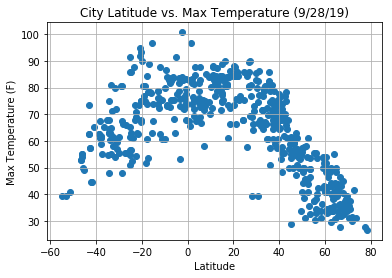

In [10]:
plt.scatter(df.Latitude, df['Max Temp'])

plt.title("City Latitude vs. Max Temperature (9/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("figures/temp.png")
plt.show()

#### Latitude vs. Humidity Plot

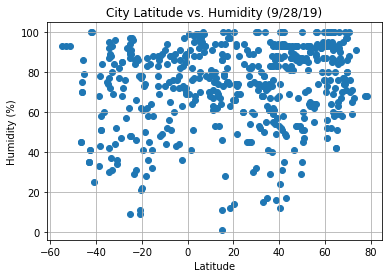

In [9]:
plt.scatter(df.Latitude, df.Humidity)

plt.title("City Latitude vs. Humidity (9/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("figures/hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

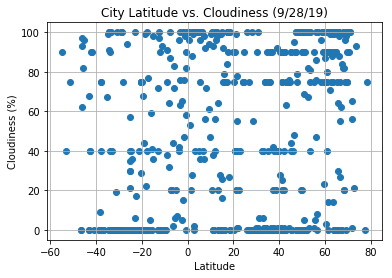

In [11]:
plt.scatter(df.Latitude, df.Cloudiness)

plt.title("City Latitude vs. Cloudiness (9/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("figures/cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

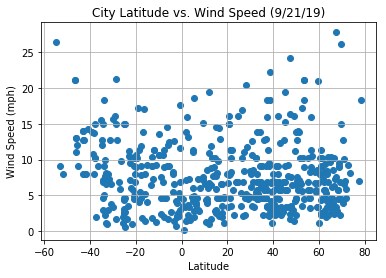

In [12]:
plt.scatter(df.Latitude, df['Wind Speed'])

plt.title("City Latitude vs. Wind Speed (9/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("figures/wind.png")
plt.show()